In [20]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [8]:
import pandas as pd
import numpy as np

In [3]:
ped_df = pd.read_csv("pheno.ped", sep='\t')

In [4]:
len(ped_df)

195

In [6]:
ped_df.head()

,familyId,personId,dadId,momId,gender,status,role
0,f1,f1.dad,0,0,1,1,dad
1,f1,f1.mom,0,0,2,1,mom
2,f1,f1.s1,f1.dad,f1.mom,2,1,sib
3,f1,f1.p1,f1.dad,f1.mom,1,2,prb
4,f1,f1.s2,f1.dad,f1.mom,1,2,sib


In [10]:
i1_m1 = pd.Series(np.random.normal(80,20, len(ped_df)), ped_df.index)

In [11]:
i1_m1.head()

0     94.085547
1     64.823843
2     75.337603
3    111.234072
4     73.487694
dtype: float64

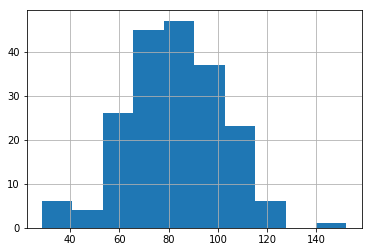

In [24]:
i1_m1.hist()

In [12]:
i1_m2 = pd.Series(np.random.normal(40,10, len(ped_df)), ped_df.index)

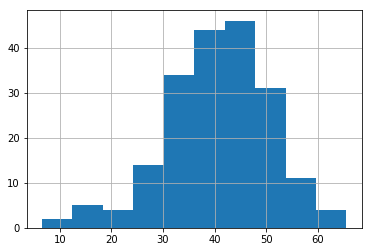

In [25]:
i1_m2.hist()

In [13]:
i1_m3 = pd.Series(np.random.normal(80,20, len(ped_df)), ped_df.index)

In [14]:
index = ped_df.status==2
len(index)

195

In [15]:
len(ped_df[index])

66

In [17]:
i1_m3[index] = np.random.normal(40, 5, len(ped_df[index]))

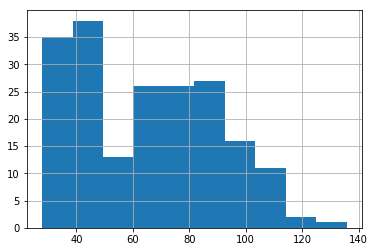

In [21]:
i1_m3.hist()

In [35]:
i1_m4 = pd.Series(np.random.poisson(2, len(ped_df)), index=ped_df.index)

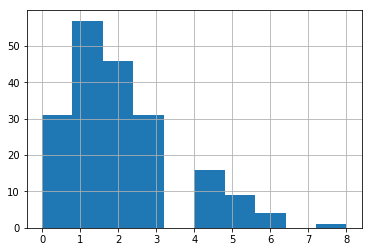

In [36]:
i1_m4.hist()

In [37]:
i1_m4 = pd.Series(np.random.poisson(4, len(ped_df)), index=ped_df.index)
i1_m4[index] = np.random.poisson(1,len(ped_df[index]))

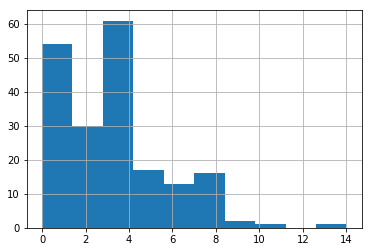

In [38]:
i1_m4.hist()

In [26]:
i1_df = pd.DataFrame(index=ped_df.index)

In [27]:
i1_df['personId'] = ped_df['personId']

In [39]:
i1_df['m1'] = i1_m1
i1_df['m2'] = i1_m2
i1_df['m3'] = i1_m3
i1_df['m4'] = i1_m4

In [40]:
i1_df.head()

,personId,m1,m2,m3,m4
0,f1.dad,94.085547,49.830935,94.794707,4
1,f1.mom,64.823843,34.350989,84.576269,3
2,f1.s1,75.337603,59.074639,135.696674,3
3,f1.p1,111.234072,29.590299,35.572648,0
4,f1.s2,73.487694,36.237950,32.010397,0


In [41]:
i1_df.to_csv("instruments/i1.csv", index=False)